In [56]:
print("test")

test


In [57]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [58]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET


# API Number of motor vehicles 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [59]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [60]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)
print("test")




{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [61]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [62]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

By retrieving this info, we do not need to think about how to impute missing values (because there are no NaN values)

In [63]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [64]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

Just to be sure, we used the isnull() function from pandas to again check if there are any missing values. According to this function we can conclude there are no NaN values and therefore do not think about how to impute/handle the missing values.

#### Since we want to use this data to portray the impact of cars in specific regions (provinces) on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [65]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity.  Therefore, we used the str.startswith() pandas functions to get only the data about the Provinces (excluding the LDs).

In [66]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [67]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']
# encode the data in order to link them to the right province (for visualization)
pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index() # 
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1)
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding)
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


In [68]:
# first sum calculates the total number of each specific vehicle typed grouped per region
# second sum aggregate the regions and show the total sum per vehicle type
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum() 
dftotal["Sum"] = dftotal.sum() #store the sum of dftotal in the "Sum" column

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


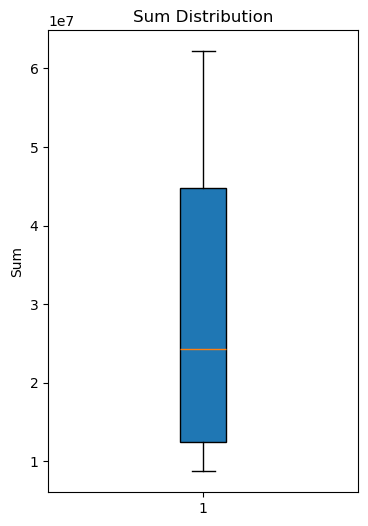

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Made this visualization code with Farheen.

In [70]:
%pip install --upgrade nbformat

Now, we will visualize the total sum of cars per region to provide a generic insight for the stakeholder. Since there are no NaN values, and this visualization is created to show describe the number of cars per region, we do not have to normalize the data. This specific data will be used to detect whether there are correlations between the measured PM2.5, PM10 and NO2, and the total numbers of cars per region.

In [71]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### However, for the predictive part it is important to standardize numerical data below, so that this data could be us to train and test the datasets and create samples that well represent the data. (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization


In [72]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

#### IMPORTANT: CHOOSE SAMPLING DURING THE PREDICTIVE PART. IT IS NOW NOT POSSIBLE TO CHOOSE THIS, BECAUSE THE SAMPLES NEEDS TO BE ALIGNED WITH PM2.5 PM10 AND NO2 DATA.

# API Luchtmeetnet NO2

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [73]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [74]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [75]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



In [76]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10644  2025-10-13T10:00:00+00:00   4.82
1     NO2        NL10247  2025-10-13T10:00:00+00:00   9.17
2     NO2        NL49007  2025-10-13T10:00:00+00:00  41.10
3     NO2        NL10934  2025-10-13T10:00:00+00:00   3.75
4     NO2        NL01489  2025-10-13T10:00:00+00:00   6.60
5     NO2        NL10236  2025-10-13T10:00:00+00:00   9.29
6     NO2        NL54004  2025-10-13T10:00:00+00:00  16.09
7     NO2        NL10450  2025-10-13T10:00:00+00:00  34.61
8     NO2        NL01491  2025-10-13T10:00:00+00:00   8.90
9     NO2        NL49551  2025-10-13T10:00:00+00:00  14.80


According to the boxplot, we can conclude that their are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possibel decisions the stakeholder should take

In [77]:
pprint(dfposts_NO2['value'] <= 0)
pprint(len(dfposts_NO2['value'] >= 0))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: value, Length: 1000, dtype: bool
1000


Since the data is real-time obtained from the api, meaning it changes the measure values every hour, it is important to determine as data analysts how we want to handle the negative values. We choose to ignore them so that the negative values could not influence how the data is perceived. 

In [78]:
import numpy as np


dfposts_NO2_clean= dfposts_NO2.copy()
dfposts_NO2_clean['value']= dfposts_NO2_clean['value'].mask(dfposts_NO2_clean['value'] < 0, np.nan)
print((dfposts_NO2_clean['value'] < 0).sum())


0


In [79]:
dfposts_NO2_raw = dfposts_NO2.copy()

In [80]:
meanlocation = dfposts_NO2_raw.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)

   station_number      value
0         NL01485  12.769231
1         NL01487   9.623077
2         NL01488  10.438462
3         NL01489   5.853846
4         NL01491   7.092308
..            ...        ...
74        NL49704   8.400000
75        NL50002   6.750000
76        NL50003   5.500000
77        NL50010   7.666667
78        NL54004  12.801538

[79 rows x 2 columns]


In [81]:
meanlocation_clean = dfposts_NO2_clean.groupby('station_number')['value'].mean().reset_index()
print(meanlocation_clean)

   station_number      value
0         NL01485  12.769231
1         NL01487   9.623077
2         NL01488  10.438462
3         NL01489   5.853846
4         NL01491   7.092308
..            ...        ...
74        NL49704   8.400000
75        NL50002   6.750000
76        NL50003   5.500000
77        NL50010   7.666667
78        NL54004  12.801538

[79 rows x 2 columns]


In [82]:
# create a bar chart representing the mean from every location alongside their measured value (raw data)
bar = px.bar(meanlocation, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

# create a bar chart representing the mean from every location alongside their measured value (clean data)
bar_NO2_clean = px.bar(meanlocation_clean, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar_NO2_clean.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_NO2_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_NO2_clean.show()

To keep an eye of the data granularity (the abstraction level of our data and what we aim to visualize) we choose to encode every station manually using the following to websites:
* 

In [83]:
NO2_pvencoding={'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL10107': 'Groningen',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49021': 'Noord-Holland',
                  'NL10938': 'Zuid-Holland',
                  'NL49019': 'Noord-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10301': 'Groningen',
                  'NL10937': 'Groningen',
                  'NL49002': 'Noord-Holland',
                  'NL50010': 'Limburg',
                  'NL50002': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL49022': 'Noord-Holland',
                  'NL10237': 'Noord-Brabant'}

dfposts_NO2['RegioS']  = dfposts_NO2['station_number'].map(NO2_pvencoding)
meanprovince = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince)


           RegioS      value
0         Drenthe   3.090000
1       Flevoland   2.503913
2       Friesland   1.938400
3      Gelderland   9.589038
4       Groningen   9.621765
5         Limburg   6.260568
6   Noord-Brabant   8.282529
7   Noord-Holland   9.692799
8      Overijssel   2.162692
9         Utrecht   5.891967
10        Zeeland  10.774605
11   Zuid-Holland  10.538087


In [84]:
print(meanprovince)

           RegioS      value
0         Drenthe   3.090000
1       Flevoland   2.503913
2       Friesland   1.938400
3      Gelderland   9.589038
4       Groningen   9.621765
5         Limburg   6.260568
6   Noord-Brabant   8.282529
7   Noord-Holland   9.692799
8      Overijssel   2.162692
9         Utrecht   5.891967
10        Zeeland  10.774605
11   Zuid-Holland  10.538087


In [85]:
dfposts_NO2_clean['RegioS']  = dfposts_NO2_clean['station_number'].map(NO2_pvencoding)
meanprovince_clean = dfposts_NO2_clean.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_clean)

           RegioS      value
0         Drenthe   3.090000
1       Flevoland   2.503913
2       Friesland   1.938400
3      Gelderland   9.589038
4       Groningen   9.621765
5         Limburg   6.260568
6   Noord-Brabant   8.282529
7   Noord-Holland   9.729850
8      Overijssel   2.162692
9         Utrecht   5.891967
10        Zeeland  10.774605
11   Zuid-Holland  10.538087


### Note for visualization team: add legend for the red line which represent the threshold.

In [86]:
print(NO2_pvencoding)
print(dfposts_NO2['RegioS'])
dfposts_NO2.info()

{'NL49703': 'Noord-Holland', 'NL49553': 'Noord-Holland', 'NL01493': 'Zuid-Holland', 'NL10404': 'Zuid-Holland', 'NL10318': 'Zeeland', 'NL01912': 'Zeeland', 'NL10742': 'Groningen', 'NL10538': 'Noord-Holland', 'NL01496': 'Zuid-Holland', 'NL01495': 'Zuid-Holland', 'NL49007': 'Noord-Holland', 'NL10636': 'Utrecht', 'NL49564': 'Noord-Holland', 'NL10818': 'Overijssel', 'NL10550': 'Noord-Holland', 'NL49546': 'Noord-Holland', 'NL10136': 'Limburg', 'NL10235': 'Noord-Brabant', 'NL01913': 'Zeeland', 'NL10918': 'Friesland', 'NL01487': 'Zuid-Holland', 'NL10639': 'Utrecht', 'NL01497': 'Zeeland', 'NL10644': 'Utrecht', 'NL10633': 'Utrecht', 'NL10741': 'Gelderland', 'NL10437': 'Zeeland', 'NL10247': 'Noord-Brabant', 'NL10445': 'Zeeland', 'NL10934': 'Friesland', 'NL01494': 'Zuid-Holland', 'NL10449': 'Zuid-Holland', 'NL49017': 'Noord-Holland', 'NL49551': 'Noord-Holland', 'NL10617': 'Flevoland', 'NL10442': 'Zuid-Holland', 'NL10446': 'Zuid-Holland', 'NL49565': 'Noord-Holland', 'NL10418': 'Zuid-Holland', 'NL10

This data contains no NaN values, therefore we do not need to consider how to impute such data

In [87]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_mean = meanprovince[meanprovince['RegioS'].isin(pv)]
bar = px.bar(meanprovince, x='RegioS' , y= dfposts_NO2.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()


pv_mean_clean = meanprovince_clean[meanprovince_clean['RegioS'].isin(pv)]
bar_cleanno2 = px.bar(meanprovince_clean, x='RegioS' , y= dfposts_NO2_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar_cleanno2.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_cleanno2.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_cleanno2.show()

In [88]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [89]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
79 station points
['NL10644' 'NL10247' 'NL49007' 'NL10934' 'NL01489' 'NL10236' 'NL54004'
 'NL10450' 'NL01491' 'NL49551' 'NL10937' 'NL10617' 'NL10445' 'NL49680'
 'NL49701' 'NL10722' 'NL10301' 'NL49019' 'NL10444' 'NL10550' 'NL49022'
 'NL01488' 'NL10636' 'NL10449' 'NL10442' 'NL49017' 'NL10741' 'NL10641'
 'NL10318' 'NL49012' 'NL10241' 'NL10738' 'NL10107' 'NL10742' 'NL49704'
 'NL10446' 'NL49553' 'NL10248' 'NL01497' 'NL50002' 'NL10938' 'NL49003'
 'NL49546' 'NL01487' 'NL10918' 'NL49014' 'NL01496' 'NL10237' 'NL10818'
 'NL10230' 'NL49561' 'NL49002' 'NL10240' 'NL10633' 'NL49565' 'NL01912'
 'NL01494' 'NL10246' 'NL10643' 'NL10136' 'NL49021' 'NL01913' 'NL49020'
 'NL50003' 'NL10404' 'NL50010' 'NL49703' 'NL01493' 'NL10639' 'NL10437'
 'NL10133' 'NL01495' 'NL10131' 'NL49564' 'NL01485' 'NL10418' 'NL10807'
 'NL10138' 'NL10929']
station_number
NL10644    13
NL10247    13
NL49007    13
NL01489    13
NL54004    13
           ..
NL50010    12
NL10237    11
NL01912    11
NL10617    10
NL10641    10
Name: co

In [90]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value,RegioS
count,1000,1000,1000,1000.000000,1000
unique,1,79,13,NaN,12
top,NO2,NL10644,2025-10-13T10:00:00+00:00,NaN,Noord-Holland
freq,1000,13,79,NaN,268
mean,NaN,NaN,NaN,8.663010,NaN
std,NaN,NaN,NaN,7.422569,NaN
min,NaN,NaN,NaN,-0.200000,NaN
25%,NaN,NaN,NaN,3.525000,NaN
50%,NaN,NaN,NaN,6.320000,NaN
75%,NaN,NaN,NaN,11.400000,NaN


According to this boxplot, their are some outliers. We choose to log transform to reduce the skewness of the dataset. 

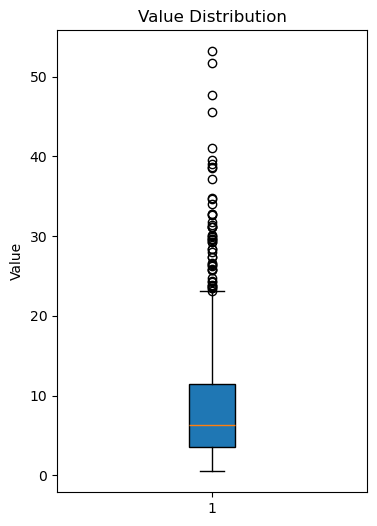

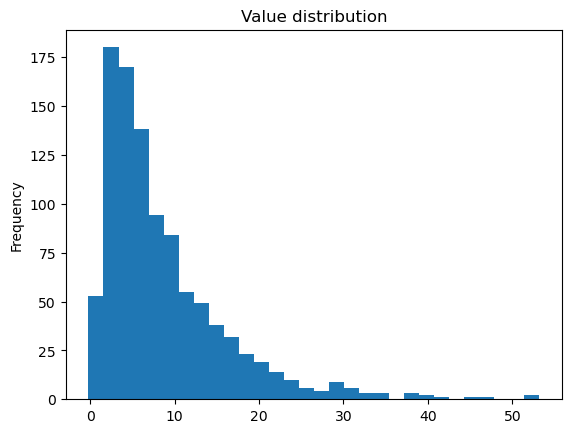

In [91]:
plt.figure(figsize=(4,6))
values = dfposts_NO2_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()



In [92]:
!pip install seaborn

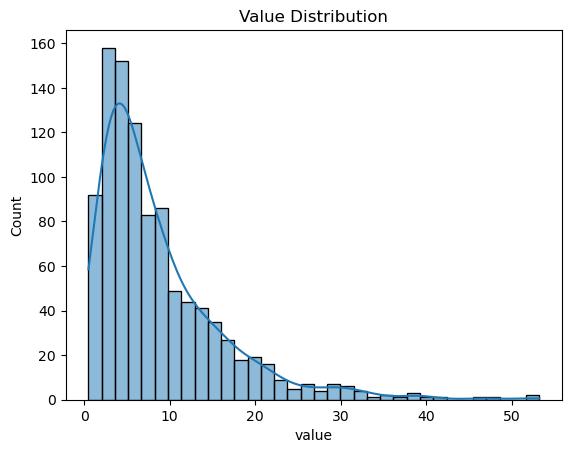

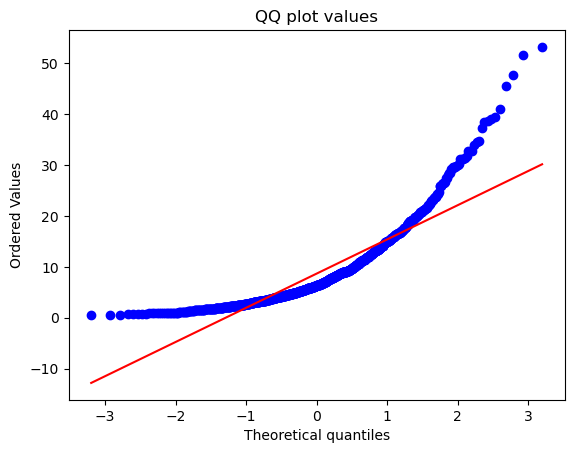

In [93]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [94]:
print(values.skew())


1.9965075917051238


In [95]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




log_x = np.log(values)
print(log_x)



0      1.572774
1      2.215937
2      3.716008
3      1.321756
4      1.887070
         ...   
995    0.104360
996    1.740466
997    2.093098
998    1.163151
999    2.211566
Name: value, Length: 999, dtype: float64


In [96]:
log_x.skew()

np.float64(-0.18122545992726197)

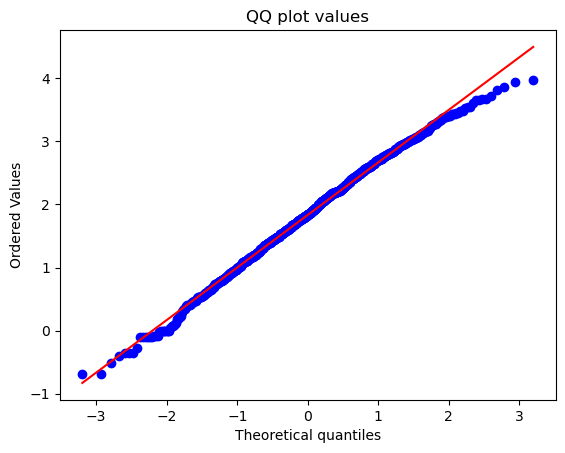

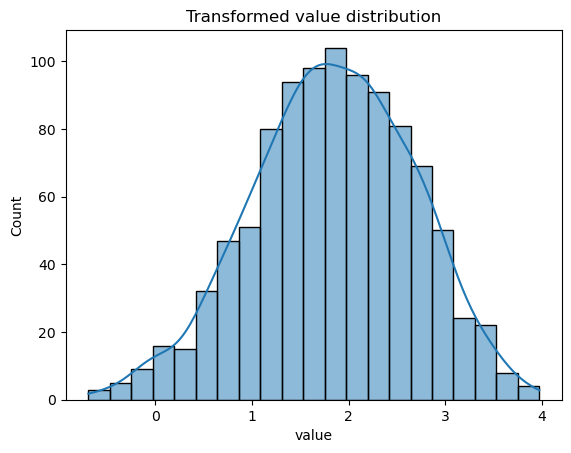

In [97]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()


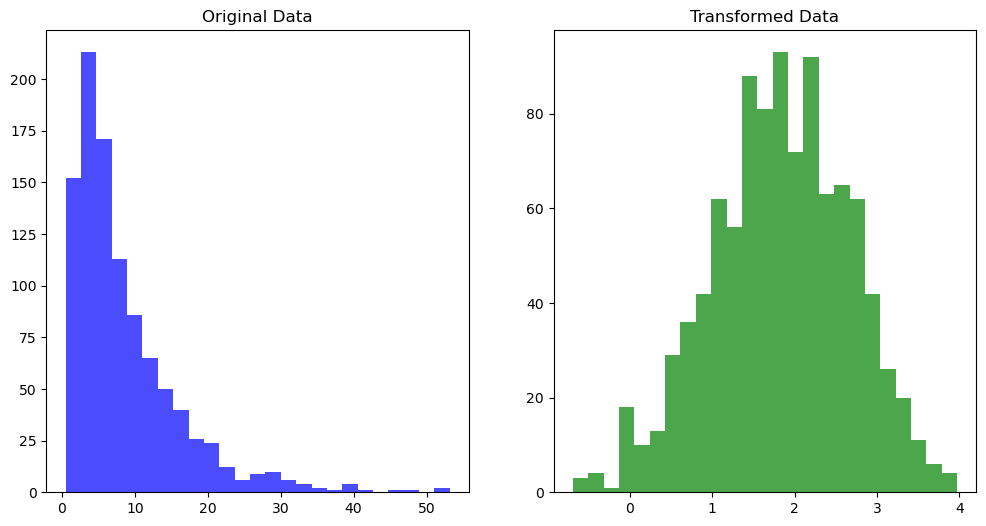

In [98]:

#distribution before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(values, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

#distribution after transformation
plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data')

plt.show()

If you compare this boxplot with the boxplot before the transformation, you can see that it handled the outliers by compressing the larger measured values (handling datapoints that could be potentially marked as outliers). However, there are some negative datapoints now.
* Kijk naar hoe je om gaat met deze data

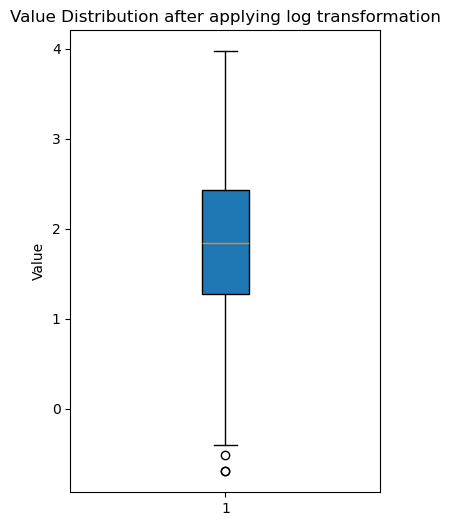

In [99]:
#boxplot after transformation
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution after applying log transformation")
plt.ylabel("Value")
plt.show()

For the predicition part, we need the log_x data to standardize this. The reason why we standardize the data is because......

In [100]:
print(meanprovince_clean)
print(dftotal)

print(meanprovince['value'].mean())


           RegioS      value
0         Drenthe   3.090000
1       Flevoland   2.503913
2       Friesland   1.938400
3      Gelderland   9.589038
4       Groningen   9.621765
5         Limburg   6.260568
6   Noord-Brabant   8.282529
7   Noord-Holland   9.729850
8      Overijssel   2.162692
9         Utrecht   5.891967
10        Zeeland  10.774605
11   Zuid-Holland  10.538087
Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoer

# NOTE: USE PREPROCESSED DATA INSTEAD OF USING THE DATA DIRECTLY from the apis

In [101]:

dfcorrelation = pd.merge(meanprovince, dfprovince, on='RegioS')

correlation = dfcorrelation[['value', 'Sum']].corr()
corr_matrix = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        text=correlation.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix.show()

Since the log_x values are stores as series instead of dataframse, we need to reshape the data (1d)
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

In [102]:
standardizeNO2 = StandardScaler().fit_transform(log_x.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

0     -0.314138
1      0.458012
2      2.258923
3     -0.615498
4      0.063190
         ...   
994   -2.077044
995   -0.112815
996    0.310537
997   -0.805912
998    0.452764
Length: 999, dtype: float64


# API Luchtmeetnet PM2.5

In [103]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [104]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM25.head(10))



  formula station_number         timestamp_measured  value
0    PM25        NL49704  2025-10-13T10:00:00+00:00   0.10
1    PM25        NL50007  2025-10-13T10:00:00+00:00  11.00
2    PM25        NL49017  2025-10-13T10:00:00+00:00   0.30
3    PM25        NL49557  2025-10-13T10:00:00+00:00  -4.20
4    PM25        NL49016  2025-10-13T10:00:00+00:00  -0.20
5    PM25        NL10131  2025-10-13T10:00:00+00:00   0.84
6    PM25        NL50011  2025-10-13T10:00:00+00:00   4.00
7    PM25        NL01494  2025-10-13T10:00:00+00:00   1.10
8    PM25        NL10138  2025-10-13T10:00:00+00:00   9.75
9    PM25        NL10230  2025-10-13T10:00:00+00:00  -1.62


After analyzing this data, there are some negative values. In the following code, we will take a look at this negative values.

In [105]:
meanlocation_PM25 = dfposts_PM25.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25)

   station_number     value
0         NL01485  2.725000
1         NL01487  2.287500
2         NL01488  2.070588
3         NL01489  2.106250
4         NL01491  2.850000
..            ...       ...
57        NL50010  7.176471
58        NL50011  4.625000
59        NL50012  8.250000
60        NL54004  2.339167
61        NL54010  2.358750

[62 rows x 2 columns]


In [106]:
print(dfposts_PM25["station_number"].isna().sum())
print(dfposts_PM25["station_number"].nunique(), "station points")
print(dfposts_PM25["station_number"].unique())
print(dfposts_PM25["station_number"].value_counts())

0
62 station points
['NL49704' 'NL50007' 'NL49017' 'NL49557' 'NL49016' 'NL10131' 'NL50011'
 'NL01494' 'NL10138' 'NL10230' 'NL01497' 'NL01491' 'NL50012' 'NL10738'
 'NL49012' 'NL10938' 'NL10241' 'NL10450' 'NL10404' 'NL49701' 'NL54010'
 'NL01493' 'NL10643' 'NL10248' 'NL10240' 'NL10741' 'NL10247' 'NL49003'
 'NL10449' 'NL10418' 'NL10934' 'NL01912' 'NL01485' 'NL49561' 'NL01913'
 'NL01495' 'NL10937' 'NL10636' 'NL01496' 'NL01489' 'NL10821' 'NL50003'
 'NL50010' 'NL01487' 'NL10136' 'NL49573' 'NL49007' 'NL49556' 'NL01488'
 'NL10641' 'NL10644' 'NL49703' 'NL49014' 'NL10444' 'NL49680' 'NL49553'
 'NL10742' 'NL49551' 'NL49980' 'NL49570' 'NL49572' 'NL54004']
station_number
NL49704    17
NL49017    17
NL10131    17
NL49016    17
NL10138    17
           ..
NL49551    16
NL49980    16
NL49570    13
NL49572    13
NL54004    12
Name: count, Length: 62, dtype: int64


In [107]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM25= dfposts_PM25['station_number'].unique()
print(uniquePM25)

intersection = np.intersect1d(uniqueNO2, uniquePM25)

print(len(intersection))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM25)
differencepm25 = np.setdiff1d(uniquePM25, uniqueNO2)
print(differencepm25, 'PM25 only')
print(differenceno2, 'NO2 only')


['NL10644' 'NL10247' 'NL49007' 'NL10934' 'NL01489' 'NL10236' 'NL54004'
 'NL10450' 'NL01491' 'NL49551' 'NL10937' 'NL10617' 'NL10445' 'NL49680'
 'NL49701' 'NL10722' 'NL10301' 'NL49019' 'NL10444' 'NL10550' 'NL49022'
 'NL01488' 'NL10636' 'NL10449' 'NL10442' 'NL49017' 'NL10741' 'NL10641'
 'NL10318' 'NL49012' 'NL10241' 'NL10738' 'NL10107' 'NL10742' 'NL49704'
 'NL10446' 'NL49553' 'NL10248' 'NL01497' 'NL50002' 'NL10938' 'NL49003'
 'NL49546' 'NL01487' 'NL10918' 'NL49014' 'NL01496' 'NL10237' 'NL10818'
 'NL10230' 'NL49561' 'NL49002' 'NL10240' 'NL10633' 'NL49565' 'NL01912'
 'NL01494' 'NL10246' 'NL10643' 'NL10136' 'NL49021' 'NL01913' 'NL49020'
 'NL50003' 'NL10404' 'NL50010' 'NL49703' 'NL01493' 'NL10639' 'NL10437'
 'NL10133' 'NL01495' 'NL10131' 'NL49564' 'NL01485' 'NL10418' 'NL10807'
 'NL10138' 'NL10929']
['NL49704' 'NL50007' 'NL49017' 'NL49557' 'NL49016' 'NL10131' 'NL50011'
 'NL01494' 'NL10138' 'NL10230' 'NL01497' 'NL01491' 'NL50012' 'NL10738'
 'NL49012' 'NL10938' 'NL10241' 'NL10450' 'NL10404' 'NL4

In [108]:
dfposts_PM25_raw = dfposts_PM25.copy()

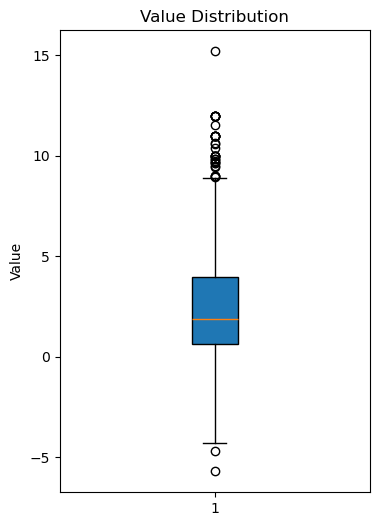

In [109]:
plt.figure(figsize=(4,6))
values_pm25 = dfposts_PM25_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [110]:
pprint((dfposts_PM25['value'] < 0).sum())
pprint((dfposts_PM25['value'] > 0).sum())

np.int64(127)
np.int64(865)


According to the boxplot, we can conclude that their are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possibel decisions the stakeholder should take

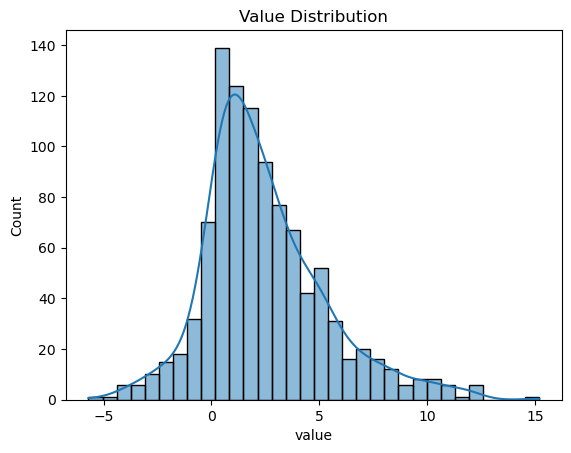

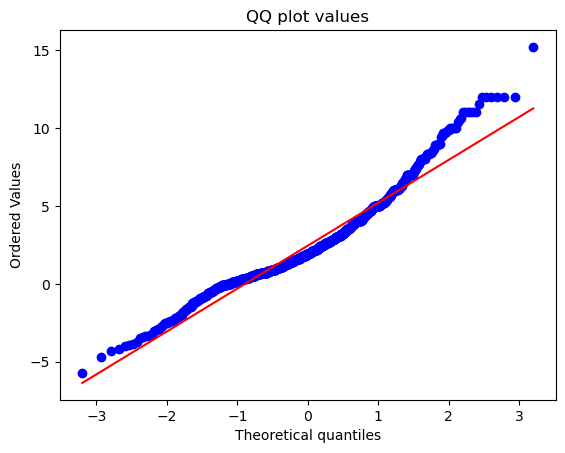

In [111]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm25, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [112]:
dfposts_PM25['value'].skew()

np.float64(0.8713881737828612)

In [113]:
c_pm25 = abs(values_pm25.min())
print(c_pm25)

5.7


In [114]:
print(values_pm25)

0       0.10
1      11.00
2       0.30
3      -4.20
4      -0.20
       ...  
995     2.67
996    11.00
997     0.37
998     1.10
999     3.10
Name: value, Length: 1000, dtype: float64


In [115]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25 = values_pm25 + c_pm25 + 0.001
log_xpm25 = np.log(shiftpm25)  
print(log_xpm25)

0      1.758030
1      2.815469
2      1.791926
3      0.406132
4      1.704930
         ...   
995    2.124773
996    2.815469
997    1.803523
998    1.917070
999    2.174865
Name: value, Length: 1000, dtype: float64


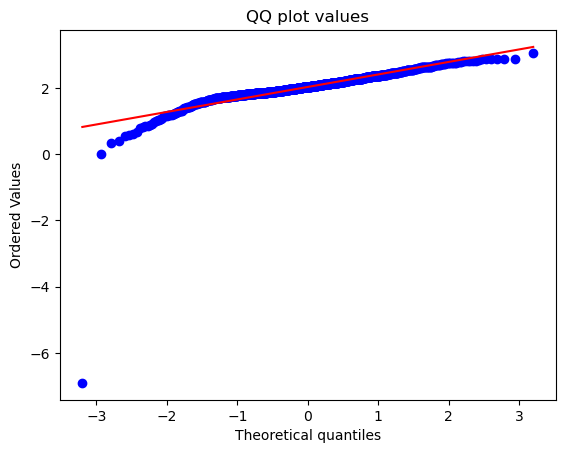

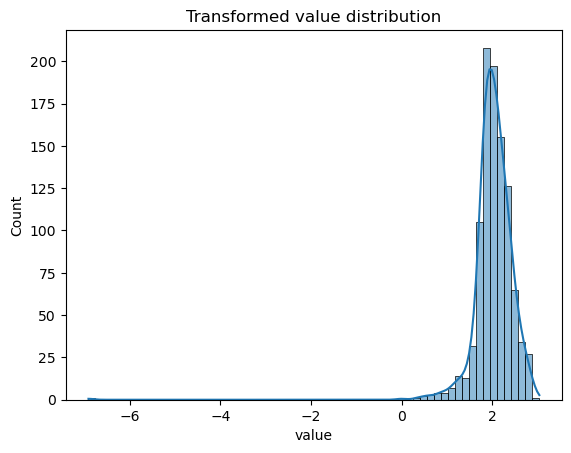

In [116]:
stats.probplot(log_xpm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm25,kde=True)
plt.title("Transformed value distribution")
plt.show()


In [117]:
log_xpm25.skew()

np.float64(-7.823511655606974)

The skewness transforms negatively, therefore we need to implement another transformation practice in order to detect and handle outliers.

In [118]:
dfposts_PM25_clean= dfposts_PM25.copy()

dfposts_PM25_clean['value']= dfposts_PM25_clean['value'].mask(dfposts_PM25_clean['value'] < 0, np.nan)

print((dfposts_PM25_clean['value'] < 0).sum())


0


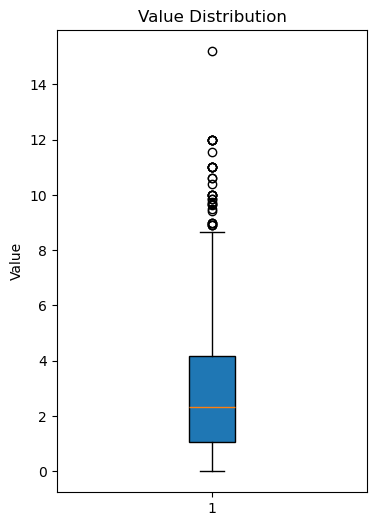

In [119]:
plt.figure(figsize=(4,6))
values_pm25_cleaned = dfposts_PM25_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [120]:
meanlocation_PM25_cleaned = dfposts_PM25_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25_cleaned)

   station_number     value
0         NL01485  2.725000
1         NL01487  2.287500
2         NL01488  2.070588
3         NL01489  2.106250
4         NL01491  2.850000
..            ...       ...
57        NL50010  7.176471
58        NL50011  4.625000
59        NL50012  8.250000
60        NL54004  2.339167
61        NL54010  2.358750

[62 rows x 2 columns]


In [121]:
bar_pm25 = px.bar(meanlocation_PM25, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm25.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25.show()

Based on the mean values, you can see that the negative values, which we marked as outliers, has an impact on the calculation of the means.

In [122]:
print(meanlocation_PM25['value'].mean())
print(meanlocation_PM25_cleaned['value'].mean())

2.4510098130443243
2.812869071656785


In [123]:
bar_pm25_clean = px.bar(meanlocation_PM25_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25_clean.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25_clean.show()

In [124]:
raw = meanlocation_PM25.groupby('station_number')['value'].mean()
clean = meanlocation_PM25_cleaned.groupby('station_number')['value'].mean()

differencepm25_raw = np.setdiff1d(raw, clean )
differencepm25_clean = np.setdiff1d(clean, raw )
difference_mergepm25 = meanlocation_PM25.merge(meanlocation_PM25_cleaned, on='station_number')
print(differencepm25_raw, "Difference in raw value")
print(differencepm25_clean,"Difference after preprocessing" )
print(difference_mergepm25)

difference= difference_mergepm25[difference_mergepm25['value_x'] != difference_mergepm25['value_y']]
print(difference)

[-1.530625   -1.2875     -1.15625    -1.10352941 -0.23375    -0.00875
  0.38125     0.6         0.75294118  0.80588235  0.83625     0.99875
  1.          1.10769231  1.12764706  1.20117647  1.2925      1.3875
  1.55294118  1.641875    1.74        1.928125    1.93882353  1.9625
  2.46823529  2.5375      2.73117647  2.74615385  3.07823529  3.26625
  4.32411765  4.363125  ] Difference in raw value
[0.29       0.325      0.5        0.625      0.64375    0.80625
 0.93333333 1.08       1.27928571 1.32625    1.56642857 1.6
 1.63666667 1.66538462 1.68125    1.74692308 1.77142857 1.81111111
 1.876      2.12666667 2.28846154 2.295      2.31333333 2.89066667
 2.97230769 3.05       3.298      3.3275     3.90769231 3.95928571
 4.631875   4.66066667] Difference after preprocessing
   station_number   value_x   value_y
0         NL01485  2.725000  2.725000
1         NL01487  2.287500  2.287500
2         NL01488  2.070588  2.070588
3         NL01489  2.106250  2.106250
4         NL01491  2.850000  2.8

Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM25 will be added to the tuple. We used the following links in order to manually link each station_numbers to its province: 
- https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 
- https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm25%7Cwind&bounds=6.90754%7C52.2298%7C6.9314%7C52.24208

In [125]:
PM25_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL10136': 'Limburg',
                  'NL01913': 'Zeeland',
                  'NL01487': 'Zuid-Holland',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10247':'Noord-Brabant', 
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL10938': 'Zuid-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL49704':'Noord-Holland',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg',
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland',
                  'NL49556': 'Noord-Holland',
                  'NL49557': 'Noord-Holland',
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland',
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen',
                  'NL50007': 'Limburg',
                  'NL50011': 'Limburg',
                  'NL50012': 'Limburg',
                  'NL54010': 'Gelderland' }



In [126]:
dfposts_PM25_raw['RegioS']  = dfposts_PM25_raw['station_number'].map(PM25_pvencoding)
meanprovince_pm25_raw = dfposts_PM25_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm25_raw)


dfposts_PM25_clean['RegioS']  = dfposts_PM25_clean['station_number'].map(PM25_pvencoding)
meanprovince_pm25_clean = dfposts_PM25_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm25_clean)


           RegioS     value
0       Flevoland  0.600000
1       Friesland -1.530625
2      Gelderland  2.075000
3       Groningen  2.610208
4         Limburg  5.331985
5   Noord-Brabant  2.779254
6   Noord-Holland  1.506829
7      Overijssel  0.998750
8         Utrecht  1.374898
9         Zeeland  2.640816
10   Zuid-Holland  2.631962

            RegioS     value
0       Flevoland  0.643750
1       Friesland  0.290000
2      Gelderland  2.321636
3       Groningen  3.559211
4         Limburg  5.571032
5   Noord-Brabant  3.961636
6   Noord-Holland  2.022664
7      Overijssel  1.279286
8         Utrecht  1.897895
9         Zeeland  2.757447
10   Zuid-Holland  2.989749


In [172]:
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean())
print('Mean PM2.5 value cleaned:', meanprovince_pm25_clean['value'].mean())

Mean PM2.5 value raw: 1.9108251718154137
Mean PM2.5 value cleaned: 2.481300467969077


In [128]:
dfposts_PM25_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [129]:
dfposts_PM25_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               873 non-null    float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [130]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm25 = meanprovince_pm25_raw[meanprovince_pm25_raw['RegioS'].isin(pv)]
bar_avgpm25_raw = px.bar(meanprovince_pm25_raw, x='RegioS' , y= meanprovince_pm25_raw['value'], title='Average µg/m³ PM2.5 per Region (raw data)')
bar_avgpm25_raw.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_avgpm25_raw.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_raw.show()

In [131]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm25 = meanprovince_pm25_clean[meanprovince_pm25_clean['RegioS'].isin(pv)]
bar_avgpm25_clean= px.bar(meanprovince_pm25_clean, x='RegioS' , y= meanprovince_pm25_clean['value'], title='Average µg/m³ PM2.5 per Region')
bar_avgpm25_clean.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_avgpm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_clean.show()

In [132]:

dfcorrelation_pm25 = pd.merge(meanprovince_pm25_clean, dfprovince, on='RegioS')

correlation_pm25 = dfcorrelation_pm25[['value', 'Sum']].corr()
corr_matrix_pm25 = go.Figure(data=go.Heatmap(
        z=correlation_pm25.values,
        x=correlation_pm25.columns,
        y=correlation_pm25.index,
        text=correlation_pm25.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm25.show()

In [ ]:
standardizeNO2 = StandardScaler().fit_transform(log_x.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

# API Luchtmeetnet PM10

In [133]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

In [134]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL01489,2025-10-13T10:00:00+00:00,3.80
1,PM10,NL01495,2025-10-13T10:00:00+00:00,7.70
2,PM10,NL01493,2025-10-13T10:00:00+00:00,6.40
3,PM10,NL50003,2025-10-13T10:00:00+00:00,10.00
4,PM10,NL50011,2025-10-13T10:00:00+00:00,11.00
5,PM10,NL10136,2025-10-13T10:00:00+00:00,21.07
6,PM10,NL49573,2025-10-13T10:00:00+00:00,4.20
7,PM10,NL49565,2025-10-13T10:00:00+00:00,-2.70
8,PM10,NL49704,2025-10-13T10:00:00+00:00,3.60
9,PM10,NL10818,2025-10-13T10:00:00+00:00,-4.53


In [135]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM10.head(10))



  formula station_number         timestamp_measured  value
0    PM10        NL01489  2025-10-13T10:00:00+00:00   3.80
1    PM10        NL01495  2025-10-13T10:00:00+00:00   7.70
2    PM10        NL01493  2025-10-13T10:00:00+00:00   6.40
3    PM10        NL50003  2025-10-13T10:00:00+00:00  10.00
4    PM10        NL50011  2025-10-13T10:00:00+00:00  11.00
5    PM10        NL10136  2025-10-13T10:00:00+00:00  21.07
6    PM10        NL49573  2025-10-13T10:00:00+00:00   4.20
7    PM10        NL49565  2025-10-13T10:00:00+00:00  -2.70
8    PM10        NL49704  2025-10-13T10:00:00+00:00   3.60
9    PM10        NL10818  2025-10-13T10:00:00+00:00  -4.53


In [136]:
dfposts_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [137]:
meanlocation_PM10 = dfposts_PM10.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10)

   station_number      value
0         NL01485   7.000000
1         NL01487   6.215385
2         NL01488   5.738462
3         NL01489   6.808333
4         NL01491   7.516667
..            ...        ...
75        NL50010   9.166667
76        NL50011   9.000000
77        NL50012  10.769231
78        NL54004   3.208571
79        NL54010   4.706923

[80 rows x 2 columns]


In [138]:
print(dfposts_PM10["station_number"].isna().sum())
print(dfposts_PM10["station_number"].nunique(), "station points")
print(dfposts_PM10["station_number"].unique())
print(dfposts_PM10["station_number"].value_counts())

0
80 station points
['NL01489' 'NL01495' 'NL01493' 'NL50003' 'NL50011' 'NL10136' 'NL49573'
 'NL49565' 'NL49704' 'NL10818' 'NL49553' 'NL10617' 'NL10937' 'NL10236'
 'NL49556' 'NL49017' 'NL10248' 'NL01488' 'NL01485' 'NL10445' 'NL10418'
 'NL10444' 'NL10807' 'NL49546' 'NL10641' 'NL49701' 'NL49020' 'NL10237'
 'NL50007' 'NL10636' 'NL10446' 'NL49003' 'NL10133' 'NL10722' 'NL50012'
 'NL10738' 'NL49014' 'NL01913' 'NL01487' 'NL01496' 'NL10741' 'NL10550'
 'NL49007' 'NL10437' 'NL10247' 'NL10138' 'NL01491' 'NL10442' 'NL10246'
 'NL10633' 'NL49980' 'NL49680' 'NL10404' 'NL49557' 'NL49551' 'NL01494'
 'NL10449' 'NL10918' 'NL49561' 'NL10230' 'NL50010' 'NL10929' 'NL01497'
 'NL10934' 'NL10240' 'NL10131' 'NL10450' 'NL10639' 'NL54010' 'NL49564'
 'NL10644' 'NL49703' 'NL49016' 'NL49012' 'NL01912' 'NL10318' 'NL10241'
 'NL49570' 'NL49572' 'NL54004']
station_number
NL50003    13
NL01493    13
NL49573    13
NL10136    13
NL49017    13
           ..
NL10248    11
NL10241     9
NL49570     9
NL49572     9
NL54004     

In [139]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM10= dfposts_PM10['station_number'].unique()
print(uniquePM10)

intersection_pm10 = np.intersect1d(uniqueNO2, uniquePM10)

print(len(intersection_pm10))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM10)
differencepm10 = np.setdiff1d(uniquePM10, uniqueNO2)
print(differencepm25, 'PM10 only')
print(differenceno2, 'NO2 only')


['NL10644' 'NL10247' 'NL49007' 'NL10934' 'NL01489' 'NL10236' 'NL54004'
 'NL10450' 'NL01491' 'NL49551' 'NL10937' 'NL10617' 'NL10445' 'NL49680'
 'NL49701' 'NL10722' 'NL10301' 'NL49019' 'NL10444' 'NL10550' 'NL49022'
 'NL01488' 'NL10636' 'NL10449' 'NL10442' 'NL49017' 'NL10741' 'NL10641'
 'NL10318' 'NL49012' 'NL10241' 'NL10738' 'NL10107' 'NL10742' 'NL49704'
 'NL10446' 'NL49553' 'NL10248' 'NL01497' 'NL50002' 'NL10938' 'NL49003'
 'NL49546' 'NL01487' 'NL10918' 'NL49014' 'NL01496' 'NL10237' 'NL10818'
 'NL10230' 'NL49561' 'NL49002' 'NL10240' 'NL10633' 'NL49565' 'NL01912'
 'NL01494' 'NL10246' 'NL10643' 'NL10136' 'NL49021' 'NL01913' 'NL49020'
 'NL50003' 'NL10404' 'NL50010' 'NL49703' 'NL01493' 'NL10639' 'NL10437'
 'NL10133' 'NL01495' 'NL10131' 'NL49564' 'NL01485' 'NL10418' 'NL10807'
 'NL10138' 'NL10929']
['NL01489' 'NL01495' 'NL01493' 'NL50003' 'NL50011' 'NL10136' 'NL49573'
 'NL49565' 'NL49704' 'NL10818' 'NL49553' 'NL10617' 'NL10937' 'NL10236'
 'NL49556' 'NL49017' 'NL10248' 'NL01488' 'NL01485' 'NL1

https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm10%7Cwind&bounds=4.98381%7C52.05999%7C5.26815%7C52.2067

In [140]:
PM10_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland', 
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland' ,
                  'NL49556': 'Noord-Holland', 
                  'NL49557': 'Noord-Holland', 
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland', 
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen', 
                  'NL50007': 'Limburg', 
                  'NL50011': 'Limburg',  
                  'NL50012': 'Limburg', 
                  'NL54010': 'Gelderland'}

In [141]:
len(PM10_pvencoding)

82

In [142]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM10 per station')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

In [143]:
dfposts_PM10['RegioS']  = dfposts_PM10['station_number'].map(PM25_pvencoding)
meanprovince_pm10 = dfposts_PM10.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10)


          RegioS     value
0      Flevoland  4.230769
1      Friesland  4.725385
2     Gelderland  4.294565
3      Groningen  4.102500
4        Limburg  9.207549
5  Noord-Brabant  6.412391
6  Noord-Holland  4.467545
7        Utrecht  3.015263
8        Zeeland  7.683784
9   Zuid-Holland  6.994407


In [144]:
dfposts_PM10_raw = dfposts_PM10.copy()

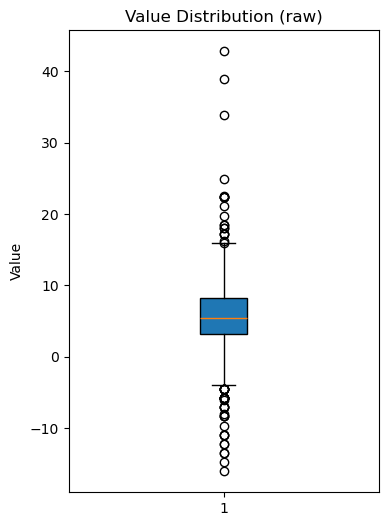

In [145]:
plt.figure(figsize=(4,6))
values_pm10_raw = dfposts_PM10_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_raw, vert=True, patch_artist=True)
plt.title("Value Distribution (raw)")
plt.ylabel("Value")
plt.show()

In [146]:
pprint((dfposts_PM10_raw['value'] < 0).sum())
pprint((dfposts_PM25_raw['value'] > 0).sum())

np.int64(95)
np.int64(865)


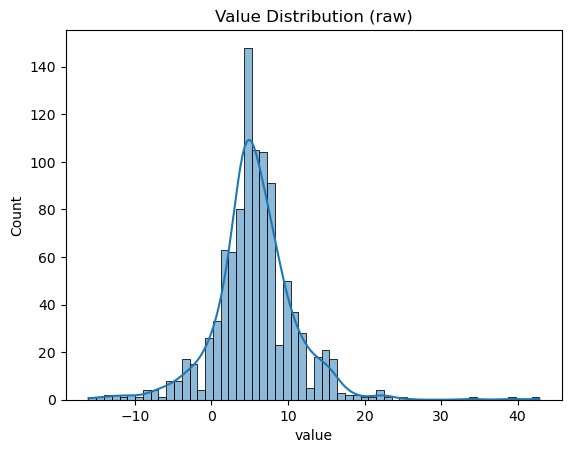

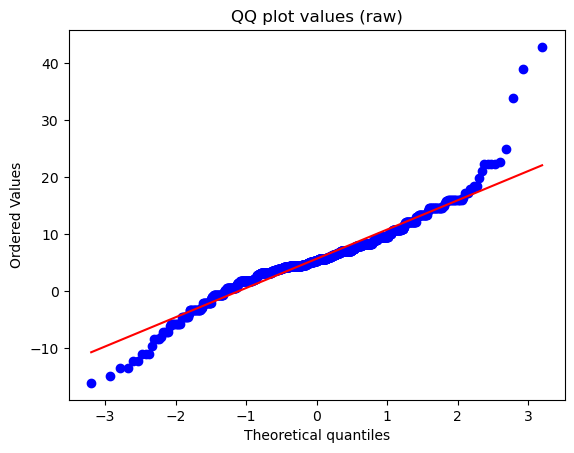

In [147]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_raw, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_raw, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [148]:
values_pm10_raw.skew()

np.float64(0.5406820002111871)

In [149]:
c_pm10 = abs(values_pm10_raw.min())

In [150]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm10 = values_pm10_raw + c_pm10 + 0.001
log_xpm10 = np.log(shiftpm10)  
print(log_xpm10)

0      2.988254
1      3.167625
2      3.111335
3      3.260056
4      3.297724
         ...   
995    3.180177
996    3.465767
997    3.291420
998    2.731832
999    2.983204
Name: value, Length: 1000, dtype: float64


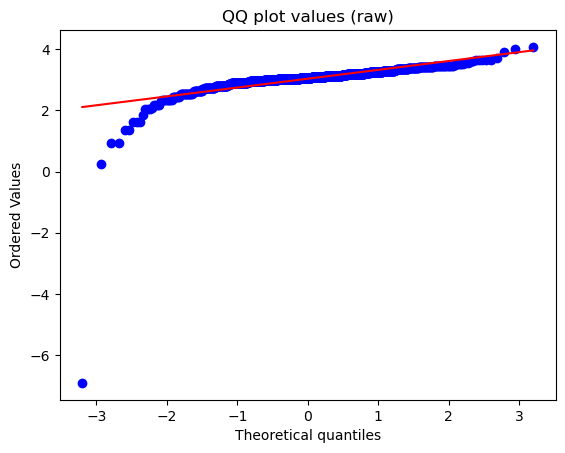

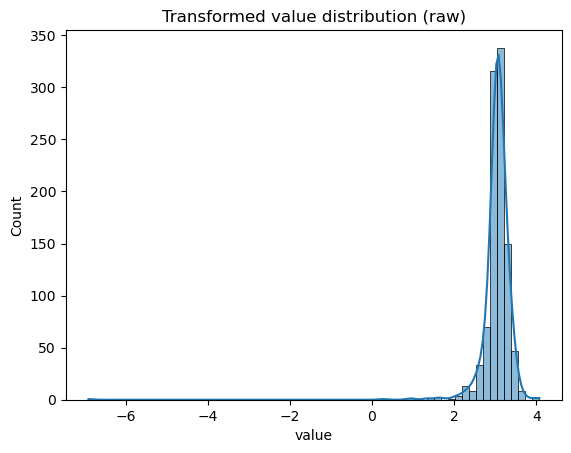

In [151]:
stats.probplot(log_xpm10, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

sns.histplot(log_xpm10,kde=True)
plt.title("Transformed value distribution (raw)")
plt.show()


In [152]:
log_xpm10.skew()

np.float64(-13.409930814650819)

In [153]:
dfposts_PM10_clean= dfposts_PM10.copy()

dfposts_PM10_clean['value']= dfposts_PM10_clean['value'].mask(dfposts_PM10_clean['value'] < 0, np.nan)

print((dfposts_PM10_clean['value'] < 0).sum())


0


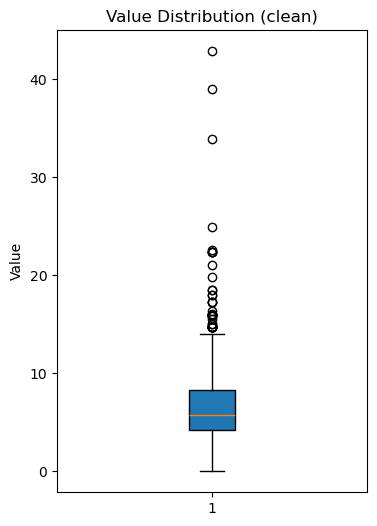

In [154]:
plt.figure(figsize=(4,6))
values_pm10_cleaned = dfposts_PM10_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution (clean)")
plt.ylabel("Value")
plt.show()

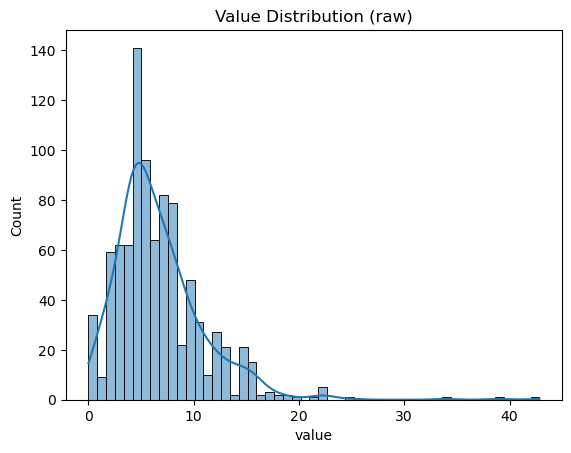

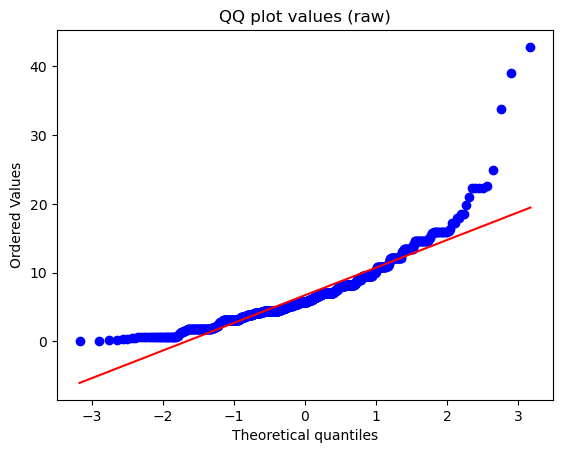

In [155]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_cleaned, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_cleaned, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [156]:
print(values_pm10_cleaned.skew())
print(values_pm10_raw.skew())

2.155460588532294
0.5406820002111871


In [157]:


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


log_xpm10_clean = np.log(values_pm10_cleaned) + 0.001  
print(log_xpm10_clean)

0      1.336001
1      2.042220
2      1.857298
3      2.303585
4      2.398895
         ...   
994    2.595508
995    2.080442
996    2.770459
997    2.383320
999    1.309333
Name: value, Length: 905, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



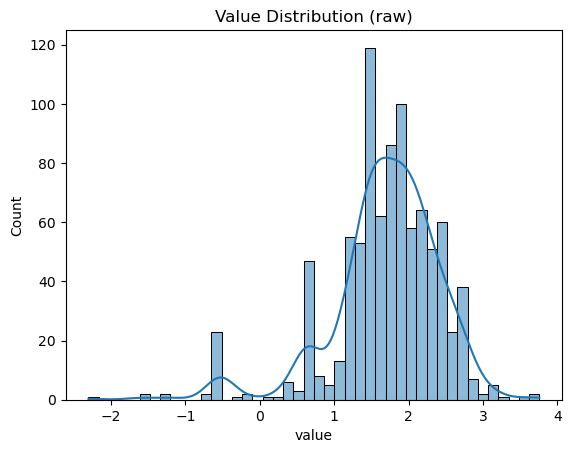

C:\Users\Ratiba Zaid\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2908: RuntimeWarning:

invalid value encountered in subtract

C:\Users\Ratiba Zaid\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning:

invalid value encountered in dot



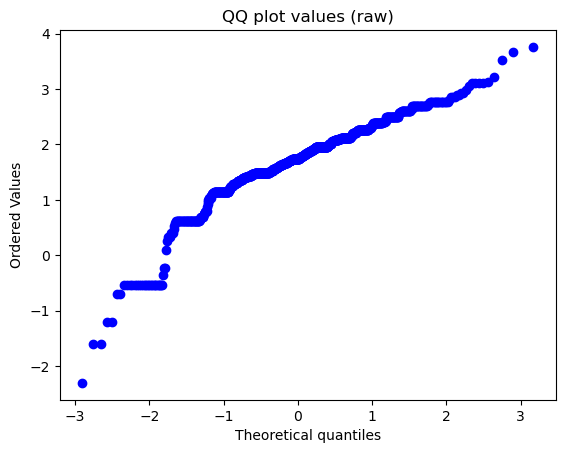

In [158]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(log_xpm10_clean, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(log_xpm10_clean, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [159]:
log_xpm10_clean.skew()

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning:

invalid value encountered in subtract



np.float64(nan)

In [160]:
dfposts_PM10_raw['RegioS']  = dfposts_PM10_raw['station_number'].map(PM10_pvencoding)
meanprovince_pm10_raw = dfposts_PM10_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10_raw)


dfposts_PM10_clean['RegioS']  = dfposts_PM10_clean['station_number'].map(PM10_pvencoding)
meanprovince_pm10_clean = dfposts_PM10_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm10_clean)


           RegioS     value
0         Drenthe  6.202308
1       Flevoland  2.656538
2       Friesland  4.686000
3      Gelderland  4.628136
4       Groningen  4.102500
5         Limburg  9.457739
6   Noord-Brabant  5.443944
7   Noord-Holland  4.462544
8      Overijssel  5.759231
9         Utrecht  3.170317
10        Zeeland  6.564267
11   Zuid-Holland  6.779458

            RegioS     value
0         Drenthe  7.920909
1       Flevoland  4.611429
2       Friesland  7.192105
3      Gelderland  5.910192
4       Groningen  4.645909
5         Limburg  9.693982
6   Noord-Brabant  7.960714
7   Noord-Holland  4.854596
8      Overijssel  8.078000
9         Utrecht  4.725385
10        Zeeland  8.232273
11   Zuid-Holland  7.651058


In [161]:
meanlocation_PM10_cleaned = dfposts_PM10_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10_cleaned)

   station_number      value
0         NL01485   7.000000
1         NL01487   6.215385
2         NL01488   5.738462
3         NL01489   6.808333
4         NL01491   7.516667
..            ...        ...
75        NL50010   9.166667
76        NL50011   9.000000
77        NL50012  10.769231
78        NL54004   3.208571
79        NL54010   4.706923

[80 rows x 2 columns]


In [162]:
rawpm10 = meanlocation_PM10.groupby('station_number')['value'].mean()
cleanpm10 = meanlocation_PM10_cleaned.groupby('station_number')['value'].mean()
 
differencepm10_raw = np.setdiff1d(rawpm10, cleanpm10 )
differencepm10_clean = np.setdiff1d(cleanpm10, rawpm10 )
difference_mergepm10 = meanlocation_PM10.merge(meanlocation_PM10_cleaned, on='station_number')
print(differencepm10_raw, "Difference in raw value")
print(differencepm10_clean,"Difference after preprocessing" )
print(difference_mergepm10)

differencepm10= difference_mergepm10[difference_mergepm10['value_x'] != difference_mergepm10['value_y']]
print(differencepm10)

[-5.45454545e-01  7.69230769e-03  9.10000000e-01  1.01666667e+00
  1.08230769e+00  1.55000000e+00  2.36230769e+00  2.51000000e+00
  2.55923077e+00  3.07777778e+00  3.20000000e+00  3.22307692e+00
  3.36333333e+00  3.83923077e+00  4.03615385e+00  4.11000000e+00
  4.13461538e+00  4.52846154e+00  4.53666667e+00  4.72538462e+00
  4.84166667e+00  4.92230769e+00  5.02076923e+00  5.21769231e+00
  5.41461538e+00  5.80846154e+00  6.10384615e+00  6.20230769e+00
  6.49769231e+00  7.38384615e+00  7.48230769e+00  7.58076923e+00
  7.95000000e+00  9.84538462e+00  1.02392308e+01] Difference in raw value
[ 1.02857143  2.72333333  3.5         3.73636364  3.95        3.96454545
  4.686       4.71444444  4.91        5.01181818  5.07        5.23
  5.28333333  5.32727273  5.966       6.094       6.17545455  6.35
  6.5         6.62428571  6.99        7.09666667  7.33909091  7.45545455
  7.45545455  7.47        7.92090909  7.98555556  8.27        8.27
  8.41222222  8.96818182  9.31727273  9.78272727 10.83     

In [163]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (raw)')
bar_pm10.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

bar_pm10_cleaned = px.bar(meanlocation_PM10_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (clean)')
bar_pm10_cleaned.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10_cleaned.show()

In [164]:
print(meanprovince_pm10_raw)
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean(), '\n')

print(meanprovince_pm10_clean)
print('Mean PM2.5 value cleaned:', meanprovince_pm10_clean['value'].mean())

           RegioS     value
0         Drenthe  6.202308
1       Flevoland  2.656538
2       Friesland  4.686000
3      Gelderland  4.628136
4       Groningen  4.102500
5         Limburg  9.457739
6   Noord-Brabant  5.443944
7   Noord-Holland  4.462544
8      Overijssel  5.759231
9         Utrecht  3.170317
10        Zeeland  6.564267
11   Zuid-Holland  6.779458
Mean PM2.5 value raw: 1.9108251718154137 

           RegioS     value
0         Drenthe  7.920909
1       Flevoland  4.611429
2       Friesland  7.192105
3      Gelderland  5.910192
4       Groningen  4.645909
5         Limburg  9.693982
6   Noord-Brabant  7.960714
7   Noord-Holland  4.854596
8      Overijssel  8.078000
9         Utrecht  4.725385
10        Zeeland  8.232273
11   Zuid-Holland  7.651058
Mean PM2.5 value cleaned: 6.789712670220587


In [165]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm10pv = meanprovince_pm10_raw[meanprovince_pm10_raw['RegioS'].isin(pv)]
bar_pm10pv = px.bar(meanprovince_pm10_raw, x='RegioS' , y= dfposts_PM10_raw.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region')
bar_pm10pv.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10pv.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv.show()



pv_meanpm10_cleaned = meanprovince_pm10_clean[meanprovince_pm10_clean['RegioS'].isin(pv)]
bar_pm10pv_cleaned = px.bar(meanprovince_pm10_clean, x='RegioS' , y= dfposts_PM10_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region (clean)')
bar_pm10pv_cleaned.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10pv_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv_cleaned.show()

In [166]:

dfcorrelation_pm10 = pd.merge(meanprovince_pm10_clean, dfprovince, on='RegioS')

correlation_pm10 = dfcorrelation_pm10[['value', 'Sum']].corr()
corr_matrix_pm10 = go.Figure(data=go.Heatmap(
        z=correlation_pm10.values,
        x=correlation_pm10.columns,
        y=correlation_pm10.index,
        text=correlation_pm10.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm10.show()

###### https://stackoverflow.com/questions/70563254/map-of-a-country-with-plotly

In [167]:
!pip install dash

In [168]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Air quality'),
    dcc.Dropdown(
        id="dropdown",
        options=["PM10", "PM2.5", "NO2"],
        value="PM10",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(typepolution):
    if typepolution=="PM10":
        return bar_pm10pv_cleaned
    elif typepolution=="PM2.5":
        return bar_avgpm25_clean
    if typepolution=="NO2":
        return bar_cleanno2


app.run(debug=True)

# To DO:
* Check the negative values. Probably measurement errors, ignore them during the calculation --> Check its impact on distribution
  * Provide comprhensive explanation about the code and provide good reasoning
* Make visualization for the following:
  * Barchart for sum location number for each province
  * Check threshold values hourly for PM10, PM2.5 and NO2
* Standardize the data and explain why we standardize the data (dbscan?)

